In [117]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sns.set(style="ticks")

In [118]:
data = pd.read_csv('travel-times.csv')

In [119]:
data.isnull().sum()

Date                0
StartTime           0
DayOfWeek           0
GoingTo             0
Distance            0
MaxSpeed            0
AvgSpeed            0
AvgMovingSpeed      0
FuelEconomy        17
TotalTime           0
MovingTime          0
Take407All          0
Comments          181
dtype: int64

In [154]:
# Удаление строк, содержащих пустые значения
data = data.dropna(axis=0, how='any')
data = data.drop(['Comments'], axis=1)

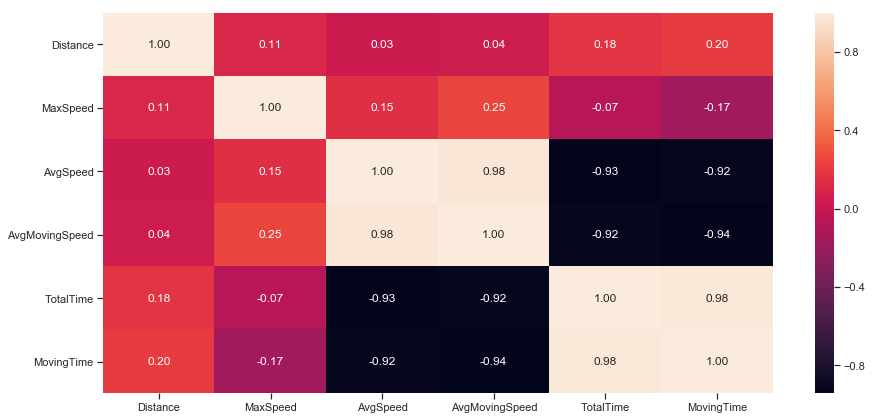

In [139]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

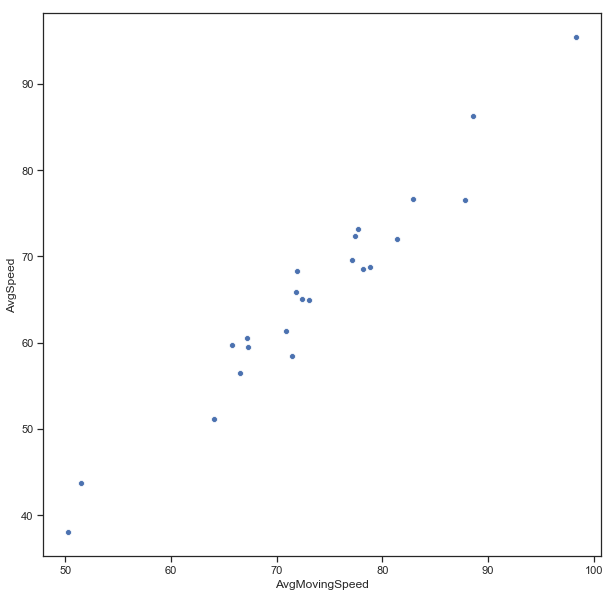

In [140]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='AvgMovingSpeed', y='AvgSpeed', data=data)

In [176]:
train, test = train_test_split(data)
train.head()

,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,TotalTime,MovingTime
165,55.57,127.7,69.6,77.1,47.9,43.2
184,49.07,121.1,73.2,77.7,40.2,37.9
156,49.18,123.0,72.0,81.4,41.0,36.3
182,53.48,124.9,68.8,78.8,46.7,40.7
60,51.28,121.4,65.9,71.8,46.7,42.1


In [158]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('AvgSpeed', axis=1), 
                                                    data['AvgSpeed'], 
                                                    random_state=42)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

0.9938231921589452
0.9775645345556779


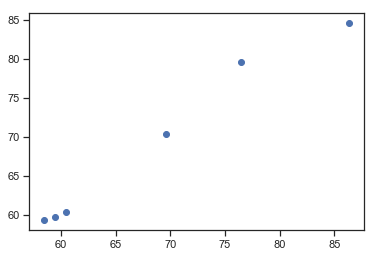

In [166]:
# Линейная модель
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
predictions = lr.predict(X_test)
plt.scatter(y_test,predictions)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

In [167]:
# SVM
from sklearn.svm import LinearSVR

linear_svr = LinearSVR(C=100).fit(X_train_scaled, y_train)
print(linear_svr.score(X_train_scaled, y_train))
print(linear_svr.score(X_test_scaled, y_test))

0.9772610204124268
0.9345237874217353


In [168]:
# Дерево решений
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor().fit(X_train, y_train)
print(tree_reg.score(X_train, y_train))
print(tree_reg.score(X_test, y_test))

1.0
0.7677531503419461


<h1>Подбор гиперпараметра</h1>

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
param_grid  = {
    'alpha': np.logspace(-7, 5, 13)
}

In [178]:
lasso = linear_model.Lasso()
lasso_grid = GridSearchCV(reg, param_grid, cv=10)
lasso_grid.fit(X_train_scaled, y_train)
print(X_train_scaled.shape) 
print("accuracy :",lasso_grid.best_score_)

c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python3

(17, 5)
accuracy : nan


c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\artur\appdata\local\programs\python\python3

In [180]:
param_grid = {
    'C': np.logspace(-7, 7, 15),
}

lin_svr = LinearSVR()
svr_grid = GridSearchCV(lin_svr, param_grid, cv=5)
svr_grid.fit(X_train_scaled, y_train)

print("accuracy :",svr_grid.best_score_)

c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\artur\appdata\local\programs\python\python37-32

accuracy : 0.9431335350592659


c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [183]:
param_grid = {
    'max_depth': np.arange(1, 10, 2),
}

dec_reg = DecisionTreeRegressor()
dec_grid = GridSearchCV(dec_reg, param_grid, cv=5)
dec_grid.fit(X_train_scaled, y_train)

print("accuracy :",dec_grid.best_score_)

accuracy : 0.5662088937468573


c:\users\artur\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
